In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

### Stations where I calculated $\partial Tr/\partial z$

Scripts **`get_dTrdzProfiles.py`** calculates $\partial Tr/\partial z$ everyday at the following stations and saves the whole profile in a csv file using pandas. I ran it for all experiments with a canyon. There are two peaks in the calculation, one below 150 m and the other one around 250 m. These are where the vertical resolution changes and when I calculated the derivative I got these spikes.

In [3]:
# Set necessary grid variables and grid file
grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC

# station locations
ys = [262,220,262,227,245,245,262,220,100]
xs = [60,60,180,180,160,200,300,300,180]

station_names = ['UpSh','UpSl','CH','CM','UpC','DnC','DnSh','DnSl','CO']

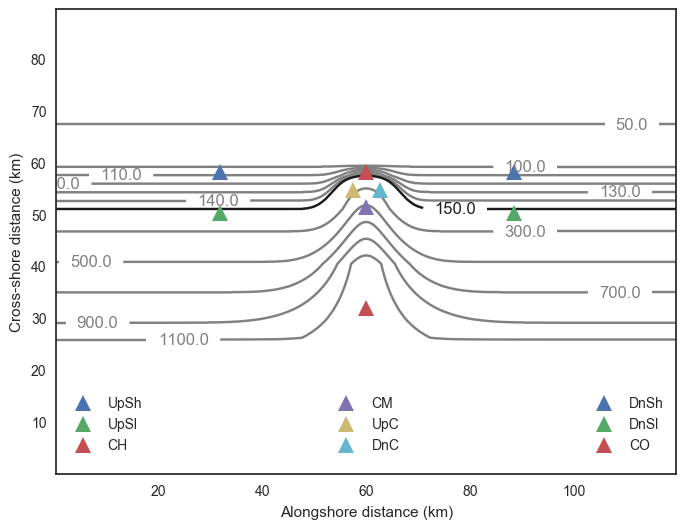

In [4]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

cntr = ax.contour(grid.X/1000,grid.Y/1000,grid.Depth,
                  [50,100,110,120,130,140,150,300,500,700,900,1100],
                  colors=['0.5','0.5','0.5','0.5','0.5','0.5','0.1','0.5','0.5','0.5','0.5','0.5','0.5'])
ax.clabel(cntr,fmt='%0.1f')

sns.set_palette('Paired',9)
for x,y,stn_name in zip(xs,ys,station_names):
    ax.plot(grid.X[x]/1000,grid.Y[y]/1000,'^',markersize=12,label=stn_name)

ax.legend(bbox_to_anchor=(0., 0.02, 1., .102), loc=8,ncol=3, mode="expand")
ax.set_xlabel('Alongshore distance (km)')
ax.set_ylabel('Cross-shore distance (km)')

<xarray.DataArray 'Z' ()>
array(-112.5)
Coordinates:
    Z        float64 -112.5
Attributes:
    units: meters
    long_name: vertical coordinate of cell center
    positive: up


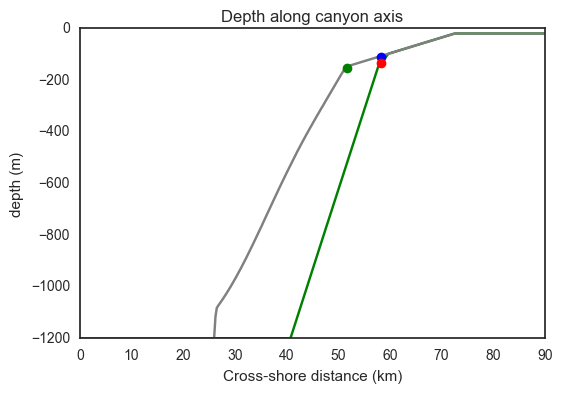

In [5]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(grid.YC[:,180]/1000,-grid.Depth[:,180],'g-')
ax.plot(grid.YC[:,100]/1000,-grid.Depth[:,100],'-',color='grey')
ax.plot(grid.YC[227,100]/1000,grid.Z[30],'go')  
ax.plot(grid.YC[262,100]/1000,grid.Z[22],'bo')  
ax.plot(grid.YC[262,100]/1000,grid.Z[26],'ro')  

ax.set_title('Depth along canyon axis')
ax.set_ylabel('depth (m)')
ax.set_xlabel('Cross-shore distance (km)')

print(grid.Z[22])

In [6]:
def plotdTrdz_profile(ax,st,expNames,col_pal,key,key0):
    
    sns.set_palette(col_pal)
    
    for runs in expNames:
        
        filename1 = ('../results/metricsDataFrames/dTr1dz_%s_%s.csv' % (runs,st))
        df = pd.read_csv(filename1)
        df_anom=df.sub(df[key0].squeeze(),axis=0)
        
        ax.plot(df_anom[key],rc[1:-1],label=runs)
        ax.plot(df_anom[key0],rc[1:-1],'--',color='grey',label='')
        
        ax.axhline(rc[30],linestyle='--',color='0.6')
        ax.axhline(rc[27],linestyle='--',color='0.6')
        ax.set_title('%s,%s' %(key, st))
        ax.set_xlabel('$dTr/dz-dTr/dz_0$ ($[C]/m$)')
        ax.set_ylabel('depth (m)')


In [7]:
def plotTr_profile(ax,st,expNames,col_pal,key,key0):
    
    sns.set_palette(col_pal)
    
    for runs in expNames:
        
        filename1 = ('../results/metricsDataFrames/Tr1_profile_%s_%s.csv' % (runs,st))
        df = pd.read_csv(filename1)
        
        ax.plot(df[key],rc[:],label=runs)
        ax.plot(df[key0],rc[:],'--',color='grey',label='')
        
        ax.axhline(rc[30],linestyle='--',color='0.6')
        ax.axhline(rc[26],linestyle='--',color='0.6')
        ax.set_title('%s,%s' %(key, st))
        ax.set_xlabel('$Tracer conc$ ($[C]$)')
        ax.set_ylabel('depth (m)')


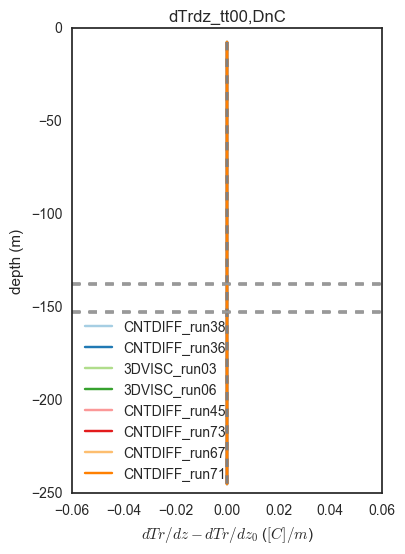

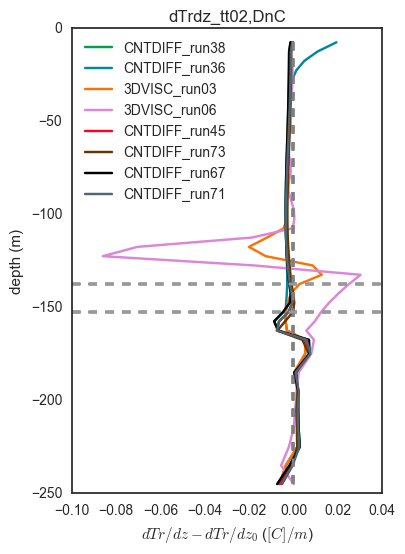

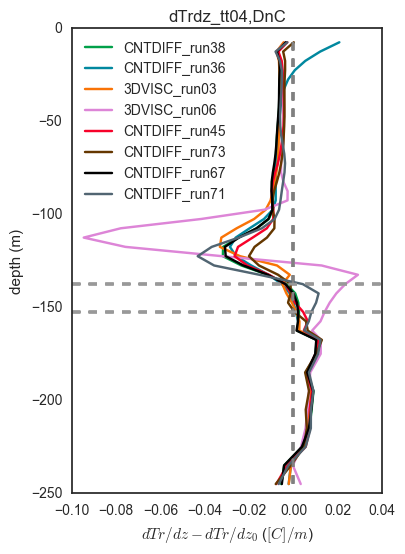

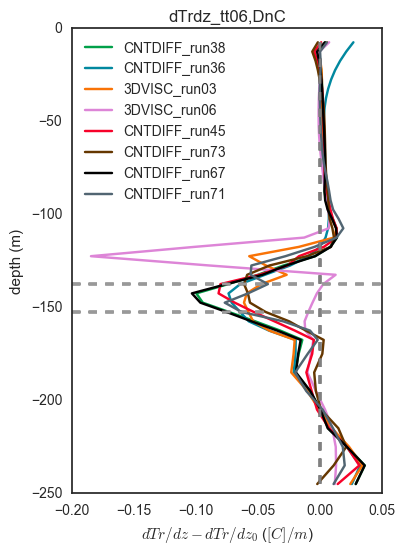

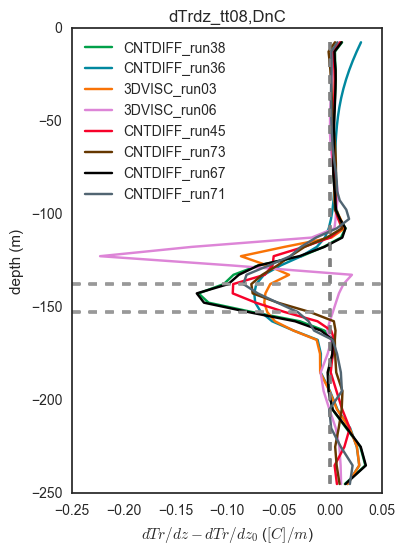

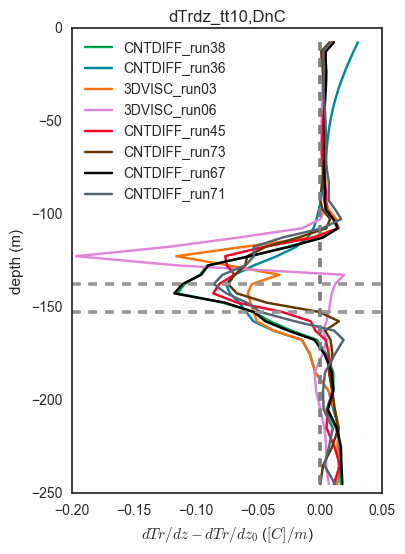

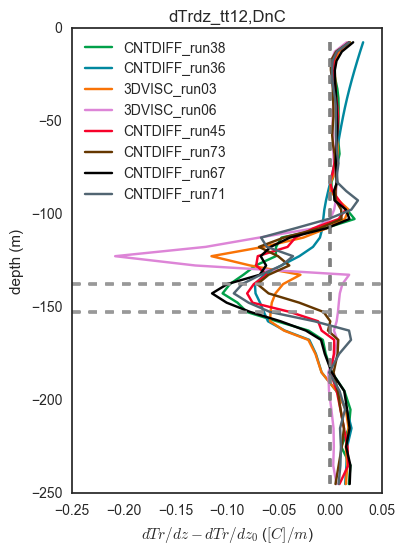

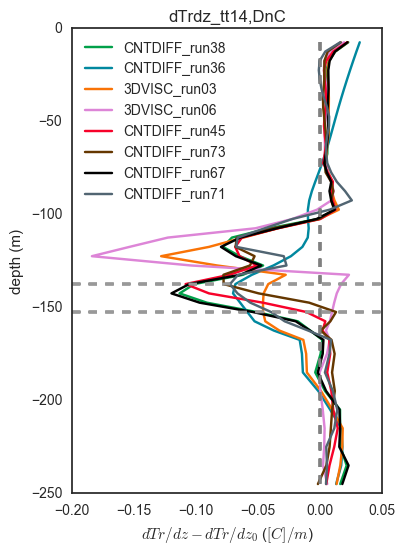

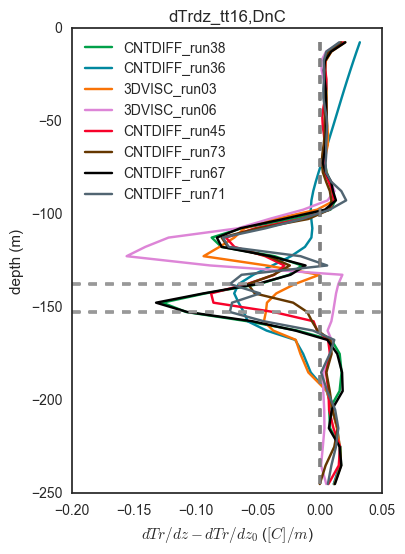

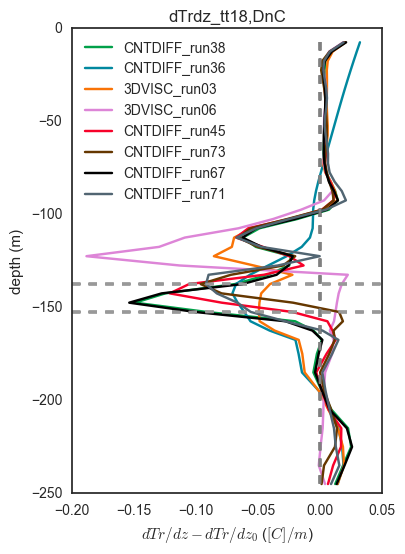

In [8]:
expNames = ['CNTDIFF_run38',
           'CNTDIFF_run36',
           '3DVISC_run03',
           '3DVISC_run06',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run67',
           'CNTDIFF_run71',
           ]


colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "lavender pink",
          "cherry red",
          "brown",
          'black',
          'slate',
          'grey']# 

colour_pal = sns.xkcd_palette(colours)

stname = 'DnC'
keys = ['dTrdz_tt00','dTrdz_tt02','dTrdz_tt04','dTrdz_tt06','dTrdz_tt08','dTrdz_tt10','dTrdz_tt12','dTrdz_tt14','dTrdz_tt16','dTrdz_tt18']

for key in keys:
    fig,ax = plt.subplots(1,1,figsize=(4,6))
    figHand = plotdTrdz_profile(ax,stname,expNames,colour_pal,key,'dTrdz_tt00')
    #figName = ('results/figures/BuoyancyFrequency/dTrdz_%s.png' %stname)
    #figHand.savefig(figName,format='png')
    
    ax.legend(loc=0)   
    plt.show()

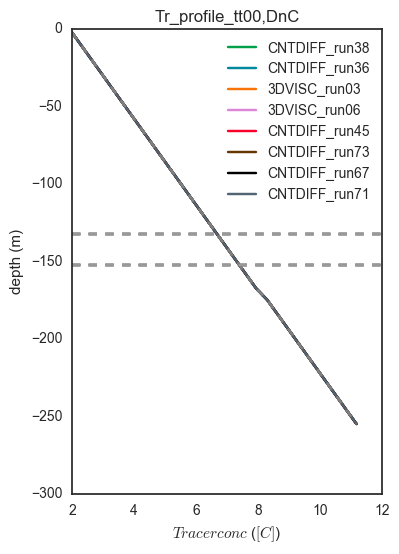

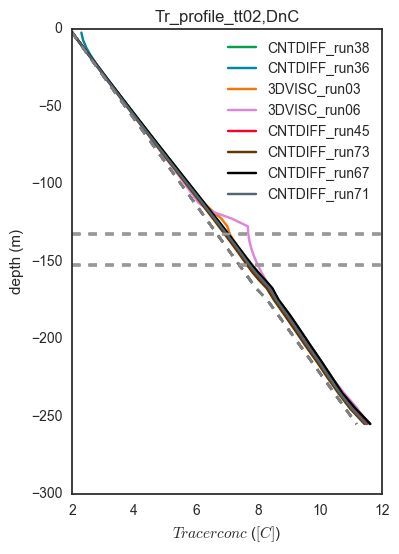

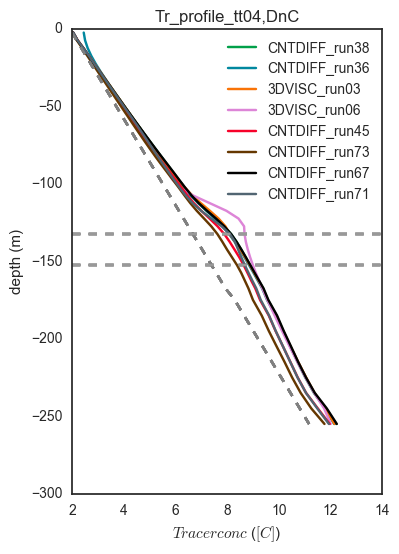

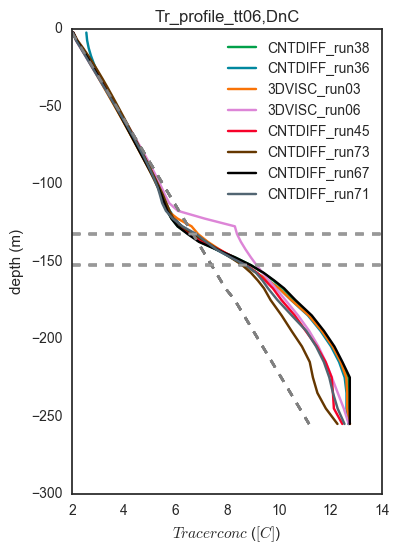

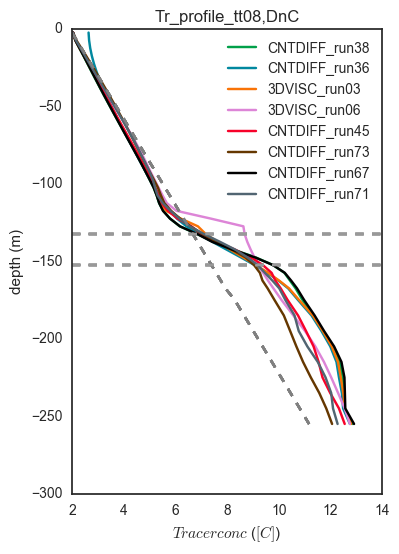

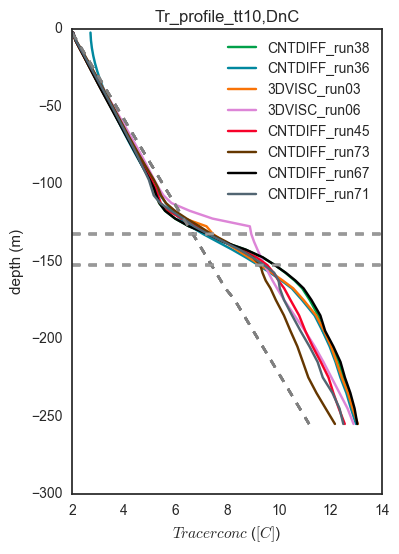

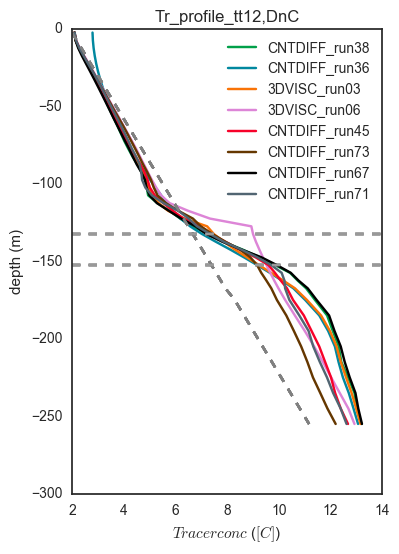

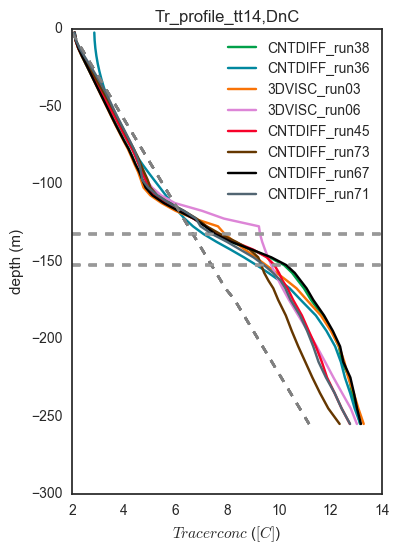

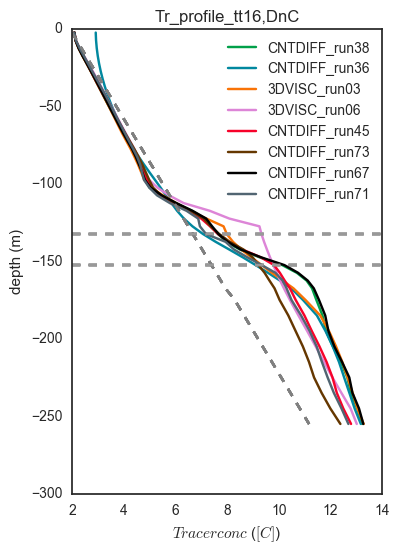

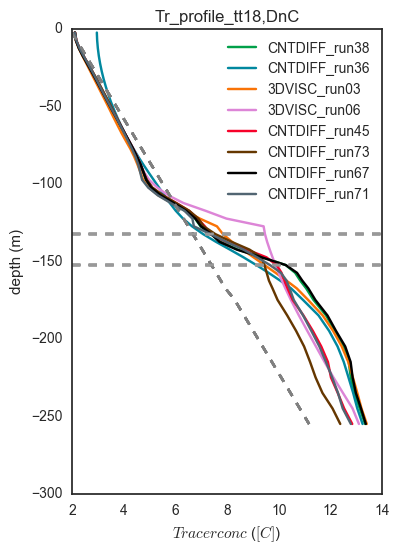

In [9]:
expNames = ['CNTDIFF_run38',
           'CNTDIFF_run36',
           '3DVISC_run03',
           '3DVISC_run06',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run67',
           'CNTDIFF_run71',
           ]


colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "lavender pink",
          "cherry red",
          "brown",
          'black',
          'slate',
          'grey']# 
colour_pal = sns.xkcd_palette(colours)

stname = 'DnC'
keys = ['Tr_profile_tt00','Tr_profile_tt02','Tr_profile_tt04','Tr_profile_tt06','Tr_profile_tt08',
        'Tr_profile_tt10','Tr_profile_tt12','Tr_profile_tt14','Tr_profile_tt16','Tr_profile_tt18']

for key in keys:
    fig,ax = plt.subplots(1,1,figsize=(4,6))
    figHand = plotTr_profile(ax,stname,expNames,colour_pal,key,'Tr_profile_tt00')
    
    ax.legend(loc=0)   
    plt.show()